In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/arijitbose/Feature_engineering/main/Travel.csv')

In [3]:
data.head(7)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0


In [4]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
categorical_feature = [feature for feature in data.columns if data[feature].dtype=='O']
categorical_feature

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [7]:
numerical_feature = [feature for feature in data.columns if data[feature].dtype!='O']
numerical_feature

['CustomerID',
 'ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [8]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [9]:
data.shape

(4888, 20)

In [10]:
len (data.CustomerID.unique())

4888

In [11]:
data.drop('CustomerID', axis=1, inplace=True)

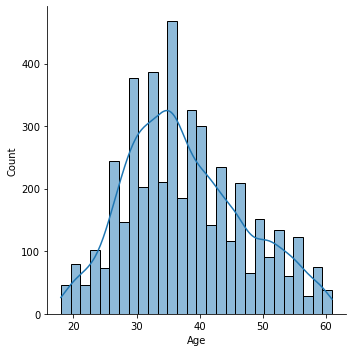

In [12]:
sns.displot(data.Age, kde=True)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

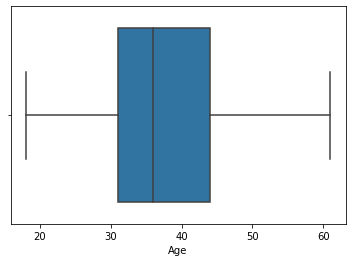

In [13]:
sns.boxplot(data.Age)

Age feature has approximately normally distributed and has no outliers so filling Age with mean of the feature itself.

In [14]:
data.Age.fillna(data.Age.mean(), inplace=True)

In [15]:
data.Age.isnull().sum()

0

In [16]:
data.DurationOfPitch.unique()

array([  6.,  14.,   8.,   9.,  30.,  29.,  33.,  22.,  21.,  32.,  25.,
        27.,  11.,  17.,  15.,  13.,  12.,  16.,  10.,  31.,  18.,  nan,
        24.,  35.,  28.,  20.,  26.,  34.,  23.,   5.,  19., 126.,   7.,
        36., 127.])

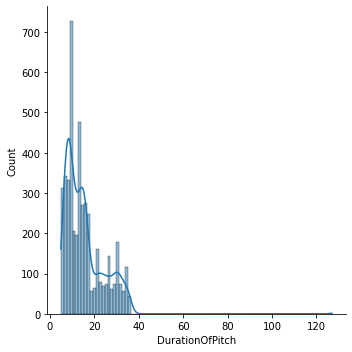

In [17]:
sns.displot(data.DurationOfPitch, kde=True)

In [18]:
def return_null_value_feature(data):
    for i in data.columns:
        if data[i].isnull().sum()>0:
            print (i)

In [19]:
return_null_value_feature(data)

TypeofContact
DurationOfPitch
NumberOfFollowups
PreferredPropertyStar
NumberOfTrips
NumberOfChildrenVisiting
MonthlyIncome


In [20]:
data.TypeofContact.value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [21]:
data.NumberOfFollowups.value_counts()

4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64

In [22]:
data.PreferredPropertyStar.value_counts()

3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64

In [23]:
data.NumberOfChildrenVisiting.value_counts()

1.0    2080
2.0    1335
0.0    1082
3.0     325
Name: NumberOfChildrenVisiting, dtype: int64

In [24]:
data.NumberOfTrips.value_counts()

2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
19.0       1
21.0       1
20.0       1
22.0       1
Name: NumberOfTrips, dtype: int64

In [25]:
data.MonthlyIncome.value_counts()

20855.0    7
21288.0    7
17342.0    7
21020.0    7
24950.0    6
          ..
17074.0    1
24250.0    1
21077.0    1
24714.0    1
21471.0    1
Name: MonthlyIncome, Length: 2475, dtype: int64

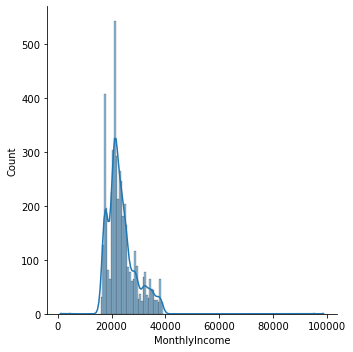

In [26]:
sns.displot(data.MonthlyIncome, kde=True)

In [27]:
ax = data.groupby('Gender')['MonthlyIncome'].sum()
ax

Gender
Fe Male     3964763.0
Female     40727006.0
Male       65258649.0
Name: MonthlyIncome, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

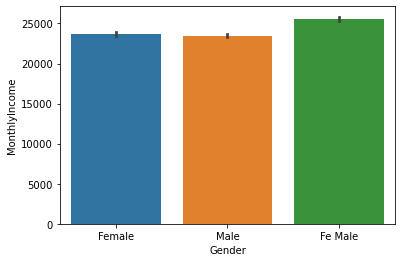

In [28]:
sns.barplot(x=data.Gender, y=data.MonthlyIncome)

<AxesSubplot:xlabel='Gender'>

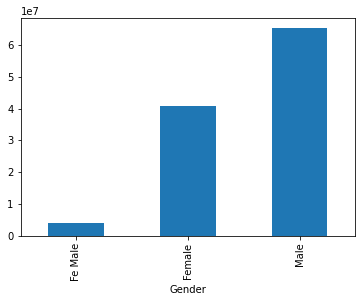

In [29]:
ax.plot(kind='bar')

In [30]:
import missingno as msno

<AxesSubplot:>

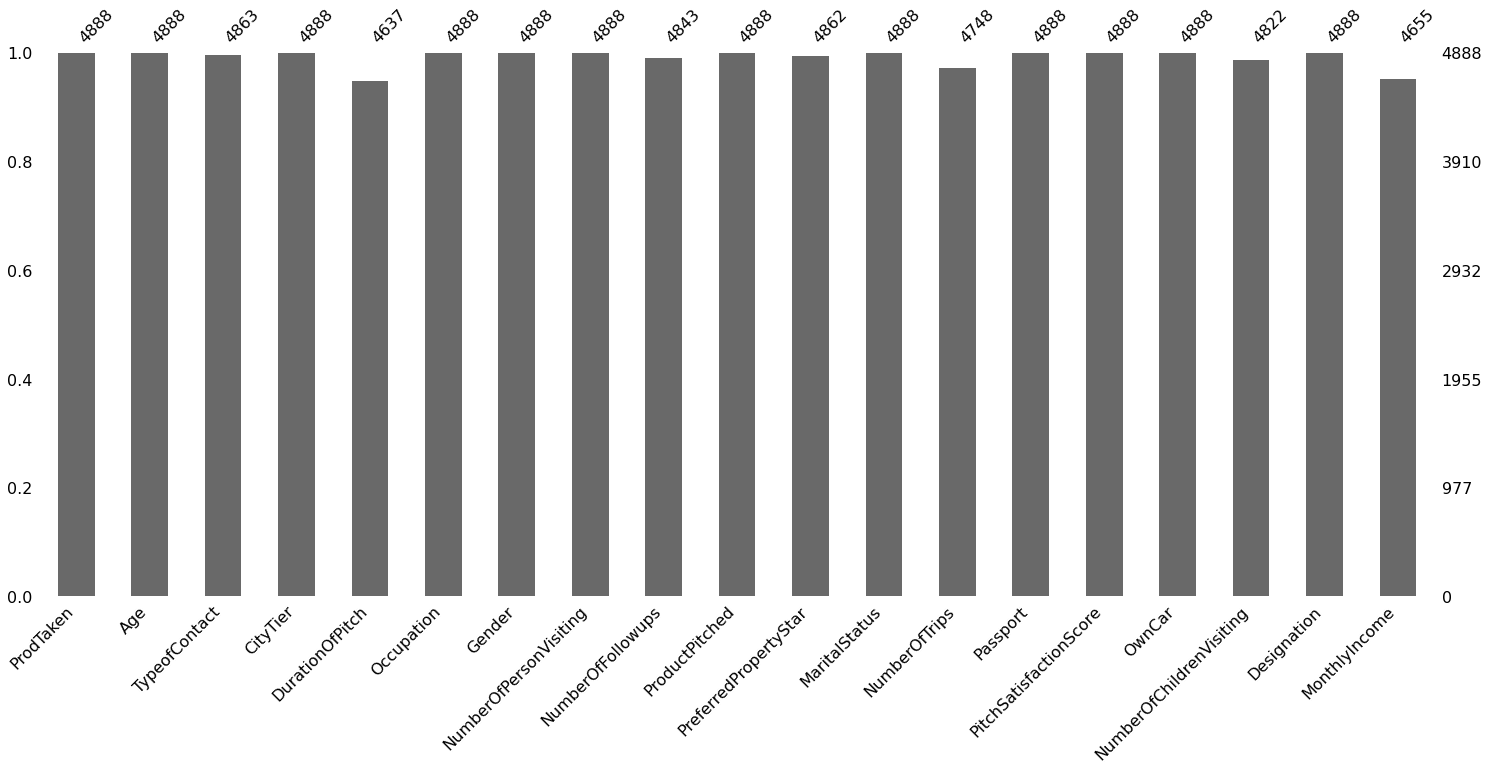

In [31]:
msno.bar(data)

In [32]:
data.corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.143717,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,-0.143717,1.000000,-0.015344,-0.011538,0.011298,-0.002490,-0.010197,0.179897,0.032602,0.018055,0.047525,0.006702,0.460597
CityTier,0.086852,-0.015344,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.078257,-0.011538,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.009627,0.011298,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.112171,-0.002490,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.099577,-0.010197,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.018898,0.179897,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.260844,0.032602,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545
PitchSatisfactionScore,0.051394,0.018055,-0.042160,-0.002880,-0.019581,0.004054,-0.022701,-0.004378,0.002926,1.000000,0.068850,0.000878,0.030421


<AxesSubplot:>

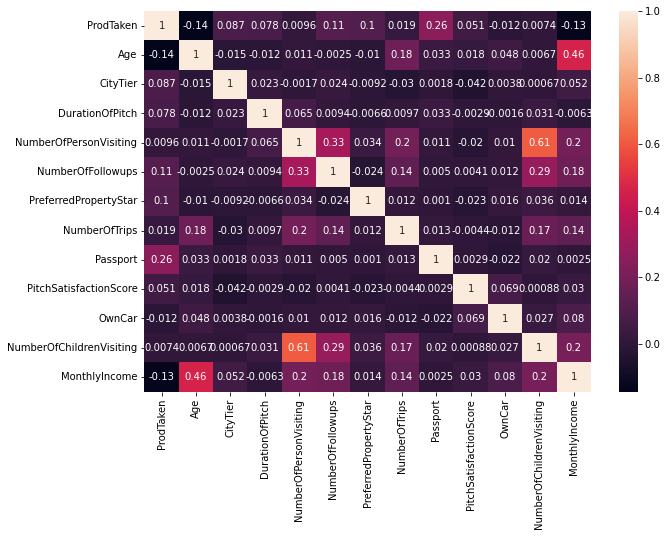

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)

In [34]:
sns.countplot(data.)

SyntaxError: invalid syntax (156427909.py, line 1)

In [ ]:
sns.countplot(data.Designation)

In [35]:
bx = data.groupby(data.Designation)['MonthlyIncome'].sum()
bx

Designation
AVP               11026438.0
Executive         34994564.0
Manager           35912048.0
Senior Manager    19765210.0
VP                 8252158.0
Name: MonthlyIncome, dtype: float64

<AxesSubplot:xlabel='Designation'>

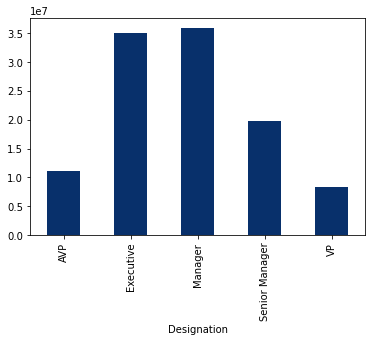

In [36]:
bx.plot(kind='bar', colormap= 'Blues_r')

In [37]:
data.Gender = data.Gender.replace('Fe Male', value='Female')

In [38]:
data.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64